In [1]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report


In [2]:
df = pd.read_csv('kddcup.data_10_percent_splited.csv').drop(columns = 'Unnamed: 0')
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,type_is_back.,type_is_imap.,type_is_satan.,type_is_phf.,type_is_nmap.,type_is_multihop.,type_is_warezmaster.,type_is_warezclient.,type_is_spy.,type_is_rootkit.
0,0,tcp,http,SF,181,5450,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,tcp,http,SF,239,486,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
type_list = []
for col in df:
    if 'type_is' in col and 'protocol_type_is' not in col:
        type_list.append(col)
type_list

['type_is_normal.',
 'type_is_buffer_overflow.',
 'type_is_loadmodule.',
 'type_is_perl.',
 'type_is_neptune.',
 'type_is_smurf.',
 'type_is_guess_passwd.',
 'type_is_pod.',
 'type_is_teardrop.',
 'type_is_portsweep.',
 'type_is_ipsweep.',
 'type_is_land.',
 'type_is_ftp_write.',
 'type_is_back.',
 'type_is_imap.',
 'type_is_satan.',
 'type_is_phf.',
 'type_is_nmap.',
 'type_is_multihop.',
 'type_is_warezmaster.',
 'type_is_warezclient.',
 'type_is_spy.',
 'type_is_rootkit.']

In [4]:
df1 = df.drop(columns = type_list)

In [5]:
data = df1.columns.values.tolist()
target = ['type']

In [6]:
data

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'type',
 'protocol_type_is_tcp',
 'protocol_type_is_udp',
 'protocol_type_is_icmp',
 'service_is_http',
 'service_is_smtp',
 'service_is_finger',
 'service_is_domain_u',
 'service_is_auth',
 'service_is_telnet',
 'service_is_ftp',

In [7]:
cat_features = []
for col in df:
    if df[col].dtypes == 'object':
        cat_features.append(col)
cat_features

['protocol_type', 'service', 'flag', 'type']

In [8]:
df1 = df.drop(columns = cat_features)
for cata in cat_features:
#     data.remove(cata)
    print(cata in data)

True
True
True
True


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

standarlize:

In [10]:
df1.columns.tolist()

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'protocol_type_is_tcp',
 'protocol_type_is_udp',
 'protocol_type_is_icmp',
 'service_is_http',
 'service_is_smtp',
 'service_is_finger',
 'service_is_domain_u',
 'service_is_auth',
 'service_is_telnet',
 'service_is_ftp',
 'service_is_eco_i',
 'service_is_ntp_u',
 'ser

In [11]:
features = ['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'protocol_type_is_tcp',
 'protocol_type_is_udp',
 'protocol_type_is_icmp',
 'service_is_http',
 'service_is_smtp',
 'service_is_finger',
 'service_is_domain_u',
 'service_is_auth',
 'service_is_telnet',
 'service_is_ftp',
 'service_is_eco_i',
 'service_is_ntp_u',
 'service_is_ecr_i',
 'service_is_other',
 'service_is_private',
 'service_is_pop_3',
 'service_is_ftp_data',
 'service_is_rje',
 'service_is_time',
 'service_is_mtp',
 'service_is_link',
 'service_is_remote_job',
 'service_is_gopher',
 'service_is_ssh',
 'service_is_name',
 'service_is_whois',
 'service_is_domain',
 'service_is_login',
 'service_is_imap4',
 'service_is_daytime',
 'service_is_ctf',
 'service_is_nntp',
 'service_is_shell',
 'service_is_IRC',
 'service_is_nnsp',
 'service_is_http_443',
 'service_is_exec',
 'service_is_printer',
 'service_is_efs',
 'service_is_courier',
 'service_is_uucp',
 'service_is_klogin',
 'service_is_kshell',
 'service_is_echo',
 'service_is_discard',
 'service_is_systat',
 'service_is_supdup',
 'service_is_iso_tsap',
 'service_is_hostnames',
 'service_is_csnet_ns',
 'service_is_pop_2',
 'service_is_sunrpc',
 'service_is_uucp_path',
 'service_is_netbios_ns',
 'service_is_netbios_ssn',
 'service_is_netbios_dgm',
 'service_is_sql_net',
 'service_is_vmnet',
 'service_is_bgp',
 'service_is_Z39_50',
 'service_is_ldap',
 'service_is_netstat',
 'service_is_urh_i',
 'service_is_X11',
 'service_is_urp_i',
 'service_is_pm_dump',
 'service_is_tftp_u',
 'service_is_tim_i',
 'service_is_red_i',
 'flag_is_SF',
 'flag_is_S1',
 'flag_is_REJ',
 'flag_is_S2',
 'flag_is_S0',
 'flag_is_S3',
 'flag_is_RSTO',
 'flag_is_RSTR',
 'flag_is_RSTOS0',
 'flag_is_OTH',
 'flag_is_SH']
x = df1.loc[:, features].values
y = df.loc[:,'type'].values
x = StandardScaler().fit_transform(x)


In [12]:
pd.DataFrame(data = x, columns = features).head()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_is_S1,flag_is_REJ,flag_is_S2,flag_is_S0,flag_is_S3,flag_is_RSTO,flag_is_RSTR,flag_is_RSTOS0,flag_is_OTH,flag_is_SH
0,-0.067792,-0.002879,0.138664,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,...,-0.010742,-0.239855,-0.00697,-0.462352,-0.004499,-0.034255,-0.042793,-0.004719,-0.004024,-0.014719
1,-0.067792,-0.002820,-0.011578,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,...,-0.010742,-0.239855,-0.00697,-0.462352,-0.004499,-0.034255,-0.042793,-0.004719,-0.004024,-0.014719
2,-0.067792,-0.002824,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,...,-0.010742,-0.239855,-0.00697,-0.462352,-0.004499,-0.034255,-0.042793,-0.004719,-0.004024,-0.014719
3,-0.067792,-0.002840,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,...,-0.010742,-0.239855,-0.00697,-0.462352,-0.004499,-0.034255,-0.042793,-0.004719,-0.004024,-0.014719
4,-0.067792,-0.002842,0.035214,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,...,-0.010742,-0.239855,-0.00697,-0.462352,-0.004499,-0.034255,-0.042793,-0.004719,-0.004024,-0.014719


In [13]:
pca = PCA(n_components=100)
principalComponents = pca.fit_transform(x)
pca.explained_variance_ratio_


array([0.10877685, 0.05035541, 0.04036463, 0.02600531, 0.0241397 ,
       0.0232104 , 0.01466119, 0.0136308 , 0.01313831, 0.01097979,
       0.01081792, 0.01021858, 0.01008652, 0.00990574, 0.00932224,
       0.00918409, 0.00911382, 0.00899915, 0.00892606, 0.00882775,
       0.00869182, 0.0086798 , 0.00865244, 0.00863376, 0.00863079,
       0.00862709, 0.00862421, 0.00862385, 0.00862345, 0.00862284,
       0.00862277, 0.00862274, 0.00862271, 0.00862269, 0.00862269,
       0.00862266, 0.00862265, 0.00862263, 0.00862261, 0.0086226 ,
       0.0086226 , 0.00862259, 0.00862257, 0.00862256, 0.00862255,
       0.00862255, 0.00862254, 0.00862253, 0.00862253, 0.00862253,
       0.00862251, 0.00862251, 0.00862249, 0.00862248, 0.00862248,
       0.00862246, 0.00862245, 0.00862244, 0.00862244, 0.00862243,
       0.00862241, 0.00862241, 0.00862238, 0.0086223 , 0.00862165,
       0.00862141, 0.008621  , 0.00862082, 0.00862073, 0.00862026,
       0.00861966, 0.00861266, 0.00855707, 0.00851671, 0.00845

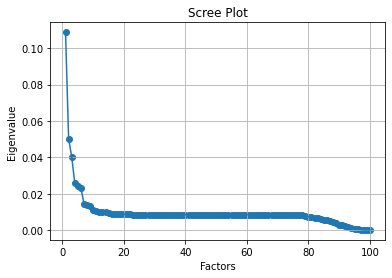

In [14]:
# Visualization
importance = pca.explained_variance_ratio_
plt.scatter(range(1,101),importance)
plt.plot(range(1,101),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

we can see that, the 14th variable is less than 1%, so we will reduce the data to 13 dimensions:

In [15]:
# decreasing to 13 dimensions
pca = PCA(n_components=13)
principalComponents = pca.fit_transform(x)
# show the results
col = ['principal component '+str(i) for i in range(1,14)]
principalDf = pd.DataFrame(data=principalComponents, columns=col)
finalDf = pd.concat([principalDf, df[['type']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,type
0,1.009563,2.721708,4.319778,-0.368200,0.622968,-0.245795,-0.935026,0.639108,-0.296657,-0.052610,-0.703135,-0.272196,0.104762,normal.
1,1.011126,2.700723,4.300891,-0.374853,0.624759,-0.241365,-0.986541,0.596993,-0.301443,-0.014483,-0.677006,-0.277698,0.115238,normal.
2,0.992858,2.674977,4.273500,-0.372953,0.624922,-0.237881,-1.023948,0.585378,-0.295188,-0.016040,-0.679806,-0.273542,0.118987,normal.
3,0.968234,2.647923,4.242544,-0.371245,0.621449,-0.235235,-1.057433,0.572627,-0.292252,-0.012427,-0.679276,-0.270843,0.124087,normal.
4,0.944926,2.620351,4.211693,-0.369084,0.620427,-0.231861,-1.092442,0.561989,-0.287292,-0.013180,-0.681444,-0.266871,0.128127,normal.


However, according to the graph above, principal component 14 to principal component 94 counts between 0.1% to 1%
To inplenment desision Tree on the data decreased to 13 dimensions:

In [16]:
X_train, X_test, y_train, y_test = train_test_split(finalDf.iloc[:, :-1], finalDf['type'], test_size=0.20, random_state=42)

In [17]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Read the csv test file

pred = clf.predict(X_test)
# accuracy
accuracy = accuracy_score(pred, y_test)
print(clf)
print(accuracy)
print(classification_report(pred, y_test, labels=None))

DecisionTreeClassifier()
0.9990182683062598


D:\Users\Cryst\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\Cryst\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\Cryst\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

                  precision    recall  f1-score   support

           back.       1.00      0.98      0.99       442
buffer_overflow.       0.78      0.88      0.82         8
      ftp_write.       1.00      0.50      0.67         2
   guess_passwd.       0.88      1.00      0.93         7
           imap.       1.00      1.00      1.00         3
        ipsweep.       0.98      0.97      0.98       266
           land.       1.00      1.00      1.00         1
     loadmodule.       0.00      0.00      0.00         3
       multihop.       0.00      0.00      0.00         0
        neptune.       1.00      1.00      1.00     21294
           nmap.       0.93      0.91      0.92        46
         normal.       1.00      1.00      1.00     19346
           perl.       1.00      0.25      0.40         4
            pod.       0.95      0.97      0.96        37
      portsweep.       0.96      0.99      0.97       230
        rootkit.       0.00      0.00      0.00         3
          sat

D:\Users\Cryst\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\Cryst\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Compared to the decision tree before PCA, the new model have about 0.5% decrease in accuracy, but is much more efficiency.

To inplenment desision Tree on the data decreased to 94 dimensions:

In [21]:
# decreasing to 13 dimensions
pca = PCA(n_components=94)
principalComponents = pca.fit_transform(x)
# show the results
col = ['principal component '+str(i) for i in range(1,95)]
principalDf = pd.DataFrame(data=principalComponents, columns=col)
finalDf = pd.concat([principalDf, df[['type']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,...,principal component 86,principal component 87,principal component 88,principal component 89,principal component 90,principal component 91,principal component 92,principal component 93,principal component 94,type
0,1.009551,2.721785,4.319762,-0.365702,0.622412,-0.244544,-0.939030,0.743574,-0.405149,0.739326,...,-0.014111,0.082743,1.024367,0.208232,0.001683,-0.403806,-1.771613,0.365436,0.749584,normal.
1,1.011115,2.700754,4.300905,-0.372445,0.624428,-0.240240,-0.986342,0.705277,-0.412617,0.716204,...,-0.030300,0.029144,0.924546,0.216677,0.011018,-0.401779,-1.657771,0.333365,0.714996,normal.
2,0.992846,2.675002,4.273521,-0.370278,0.624193,-0.236499,-1.024883,0.692628,-0.401806,0.718390,...,-0.026774,-0.013616,0.836108,0.220897,0.009093,-0.404154,-1.548417,0.303762,0.678271,normal.
3,0.968222,2.647938,4.242574,-0.368373,0.620452,-0.233699,-1.058796,0.679814,-0.396057,0.717927,...,-0.025771,-0.053450,0.750551,0.222235,0.009019,-0.407329,-1.442922,0.275875,0.639325,normal.
4,0.944914,2.620360,4.211728,-0.365963,0.619065,-0.230097,-1.094852,0.668387,-0.386997,0.719615,...,-0.022591,-0.093707,0.664072,0.225317,0.007523,-0.410646,-1.335352,0.247124,0.602096,normal.


In [22]:
X_train, X_test, y_train, y_test = train_test_split(finalDf.iloc[:, :-1], finalDf['type'], test_size=0.20, random_state=42)

In [23]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Read the csv test file

pred = clf.predict(X_test)
# accuracy
accuracy = accuracy_score(pred, y_test)
print(clf)
print(accuracy)
print(classification_report(pred, y_test, labels=None))

DecisionTreeClassifier()
0.9990891149233339


D:\Users\Cryst\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\Cryst\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\Cryst\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

                  precision    recall  f1-score   support

           back.       1.00      0.98      0.99       442
buffer_overflow.       0.56      0.71      0.63         7
      ftp_write.       1.00      0.50      0.67         2
   guess_passwd.       0.88      1.00      0.93         7
           imap.       1.00      1.00      1.00         3
        ipsweep.       0.98      0.99      0.98       263
           land.       1.00      1.00      1.00         1
     loadmodule.       0.00      0.00      0.00         2
       multihop.       0.00      0.00      0.00         0
        neptune.       1.00      1.00      1.00     21290
           nmap.       0.93      0.88      0.90        48
         normal.       1.00      1.00      1.00     19341
           perl.       1.00      0.25      0.40         4
            pod.       1.00      0.95      0.97        40
      portsweep.       0.96      0.98      0.97       232
        rootkit.       0.00      0.00      0.00         3
          sat

D:\Users\Cryst\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\Cryst\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
